# Tables

Making a good looking table is actually somewhat hard to do in Python without using a package.

We can use the `tabulate` package to make a nice looking table in Python.
The downside is that it's not very flexible and doesn't translate very well into a matplotlib image, but it's good for quick and dirty tables.

```python
from tabulate import tabulate
print(tabulate([['Alice', 24], ['Bob', 19]], headers=['Name', 'Age']))
```

But let's work with some football data to do it.


In [31]:
import pandas as pd

from tabulate import tabulate

url = 'https://fbref.com/en/comps/Big5/2022-2023/2022-2023-Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={'id': 'big5_table'})[0]
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Napoli,it ITA,1,38,28,6,4,77,28,49,90,2.37,64.7,31.8,33.0,0.87,46173,Victor Osimhen - 26,Alex Meret
1,2,Manchester City,eng ENG,1,38,28,5,5,94,33,61,89,2.34,78.6,32.1,46.5,1.22,53249,Erling Haaland - 36,Ederson
2,3,Barcelona,es ESP,1,38,28,4,6,70,20,50,88,2.32,75.5,33.2,42.3,1.11,83498,Robert Lewandowski - 23,Marc-André ter Stegen
3,4,Paris S-G,fr FRA,1,38,27,4,7,89,40,49,85,2.24,78.2,48.3,29.9,0.79,46334,Kylian Mbappé - 29,Gianluigi Donnarumma
4,5,Arsenal,eng ENG,2,38,26,6,6,88,43,45,84,2.21,71.9,42.0,29.9,0.79,60191,"Martin Ødegaard, Gabriel Martinelli - 15",Aaron Ramsdale


In [32]:
# Lets make a table of the top 10 teams by goal difference
df = df.sort_values('GD', ascending=False)
df.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
1,2,Manchester City,eng ENG,1,38,28,5,5,94,33,61,89,2.34,78.6,32.1,46.5,1.22,53249,Erling Haaland - 36,Ederson
6,7,Bayern Munich,de GER,1,34,21,8,5,92,38,54,71,2.09,75.0,37.1,37.8,1.11,75000,Serge Gnabry - 14,Yann Sommer
2,3,Barcelona,es ESP,1,38,28,4,6,70,20,50,88,2.32,75.5,33.2,42.3,1.11,83498,Robert Lewandowski - 23,Marc-André ter Stegen
0,1,Napoli,it ITA,1,38,28,6,4,77,28,49,90,2.37,64.7,31.8,33.0,0.87,46173,Victor Osimhen - 26,Alex Meret
3,4,Paris S-G,fr FRA,1,38,27,4,7,89,40,49,85,2.24,78.2,48.3,29.9,0.79,46334,Kylian Mbappé - 29,Gianluigi Donnarumma
4,5,Arsenal,eng ENG,2,38,26,6,6,88,43,45,84,2.21,71.9,42.0,29.9,0.79,60191,"Martin Ødegaard, Gabriel Martinelli - 15",Aaron Ramsdale
5,6,Lens,fr FRA,2,38,25,9,4,68,29,39,84,2.21,66.7,43.5,23.2,0.61,37652,Loïs Openda - 21,Brice Samba
7,8,Dortmund,de GER,2,34,22,5,7,83,44,39,71,2.09,71.1,43.2,27.9,0.82,81228,"Julian Brandt, Donyell Malen... - 9",Gregor Kobel
8,9,Real Madrid,es ESP,2,38,24,6,8,75,36,39,78,2.05,75.5,38.9,36.6,0.96,56649,Karim Benzema - 19,Thibaut Courtois
9,10,Atlético Madrid,es ESP,3,38,23,8,7,70,33,37,77,2.03,61.9,41.1,20.8,0.55,55800,Antoine Griezmann - 15,Jan Oblak


In [33]:
df = df[['Squad', 'GF', 'GA', 'GD', 'Pts']]

table = tabulate(df.head(10), headers='keys', tablefmt='pipe')

In [34]:
print(table)

|    | Squad           |   GF |   GA |   GD |   Pts |
|---:|:----------------|-----:|-----:|-----:|------:|
|  1 | Manchester City |   94 |   33 |   61 |    89 |
|  6 | Bayern Munich   |   92 |   38 |   54 |    71 |
|  2 | Barcelona       |   70 |   20 |   50 |    88 |
|  0 | Napoli          |   77 |   28 |   49 |    90 |
|  3 | Paris S-G       |   89 |   40 |   49 |    85 |
|  4 | Arsenal         |   88 |   43 |   45 |    84 |
|  5 | Lens            |   68 |   29 |   39 |    84 |
|  7 | Dortmund        |   83 |   44 |   39 |    71 |
|  8 | Real Madrid     |   75 |   36 |   39 |    78 |
|  9 | Atlético Madrid |   70 |   33 |   37 |    77 |


In [35]:
# Ok so that was easy to make a table, but it's not very pretty. Let's use the tabulate package to make it look better
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))

+---+-----------------+----+----+----+-----+
|   |      Squad      | GF | GA | GD | Pts |
+---+-----------------+----+----+----+-----+
| 1 | Manchester City | 94 | 33 | 61 | 89  |
| 6 |  Bayern Munich  | 92 | 38 | 54 | 71  |
| 2 |    Barcelona    | 70 | 20 | 50 | 88  |
| 0 |     Napoli      | 77 | 28 | 49 | 90  |
| 3 |    Paris S-G    | 89 | 40 | 49 | 85  |
| 4 |     Arsenal     | 88 | 43 | 45 | 84  |
| 5 |      Lens       | 68 | 29 | 39 | 84  |
| 7 |    Dortmund     | 83 | 44 | 39 | 71  |
| 8 |   Real Madrid   | 75 | 36 | 39 | 78  |
| 9 | Atlético Madrid | 70 | 33 | 37 | 77  |
+---+-----------------+----+----+----+-----+


(0.0, 1.0, 0.0, 1.0)

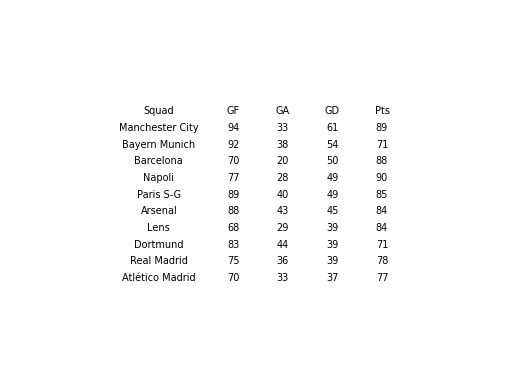

In [42]:
# Now let's add this table to a matplotlib plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.table(
    cellText=df.head(10).values, 
    colLabels=df.columns, 
    loc='center',
    cellLoc='center',
    edges='open',
    colWidths=[0.2, 0.1, 0.1, 0.1, 0.1],
    colColours=['blue']*5
)

ax.axis('off')


### There's more customization that can be done with tables in matplotlib but we won't cover that here just for time's sake.